In [2]:
import numpy as np
import scipy as sp
import PIL
import matplotlib

from matplotlib.pyplot import imshow
from PIL import Image

JPEG
(199, 300)
RGB


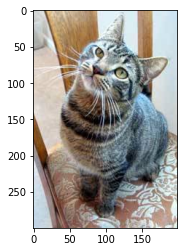

In [54]:
image = Image.open('cat.jpg')
print(image.format) 
print(image.size) 
print(image.mode)
imshow(np.asarray(image))

Now lets perform SVD on this image

In [38]:
img = np.asarray(image).transpose()
print(img.shape)

#We need to transpose the Image based on how numpy's SVD works. Sometimes it doesn't converge, so we just try again!
u, s, vh = np.linalg.svd(img, full_matrices = False)

#Now we want to compress the image via SVD. Thankfully numpy can handle SVD for higher dimensional (dim > 2) arrays!
print(u.shape)
print(vh.shape)
print(s.shape)

(3, 199, 300)
(3, 199, 199)
(3, 199, 300)
(3, 199)


The Image now becomes compressed, although the color is off which I suspect is from how matplotlib handles color since we didn't normalize the color in the beginning

(300, 199)


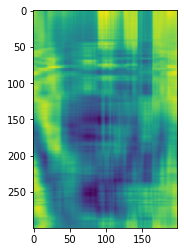

In [42]:
k = 5
Compressed_Image = sum([u[i,:,:k] @ np.diag(s[i,:k])@ vh[i,:k,:] for i in range(3)]).transpose()

print(Compressed_Image.shape)
imshow(Compressed_Image)
    